# Lab 17 - Cross tabulation

Cross tabulation is a method to count how many data points fits in different categoriese.  The output is a *contingency table* or *cross tab* which contains this information.

This lab will use:
- the insurance dataset from Labs 7,8, and 13 (download [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/insurance.csv))
- the dataset of all film permits issued in New York city, which on NYC Open Data [here](https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p).  To download: 
    - click "View Data" (blue button in upper right)
    - on the next page, click "Export" (in menu in upper right)
    - click "CSV" to download
    - if you have trouble, the dataset is [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/Film_Permits.csv)
    
Import the necessary packages and tell Jupyter to display all plots and all dataframe columns.

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

## Insurance Data

Read the insurance data into the dataframe `insurance` and check that it was read in correctly.

In [4]:
insurance = pd.read_csv("insurance.txt")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We can make a continguency table of the sex and smoker columns as follows:

In [5]:
pd.crosstab(insurance["sex"], insurance["smoker"])

smoker,no,yes
sex,,
female,547,115
male,517,159


How many female smokers are there?  How many male non-smokers?

__There are 115 female smokers and 517 make non-smokers.__

If we wanted to know how much data is in a particular category (say non-smokers), we could add up the values in that row or column.  But Pandas can do this for us, by adding the parameter `margins = True`.  Try it below.

In [6]:
pd.crosstab(insurance["sex"], insurance["smoker"], margins = True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


How could you compute the proportion of male smokers?

__Divide the number of male smokers by the number of males in the dataset. (159 / 676)__

We can also have Pandas compute the proportions instead of the number of people fitting each category.  Add the parameter `normalize = True`.

In [7]:
pd.crosstab(insurance["sex"], insurance["smoker"], margins = True, normalize = True)

smoker,no,yes,All
sex,,,
female,0.408819,0.085949,0.494768
male,0.386398,0.118834,0.505232
All,0.795217,0.204783,1.000000


What's the proportion of male smokers in the data?  What's the proportion of females in the data?

__The proportion of male smokers in the data is 0.119 and the proportion of females in the data is 0.495.__

We can include a third category in our continguency table as follows:

In [8]:
pd.crosstab(insurance["region"],[insurance["sex"],insurance["smoker"]], margins = True)

sex       female      male        All
smoker        no  yes   no  yes      
region                               
northeast    132   29  125   38   324
northwest    135   29  132   29   325
southeast    139   36  134   55   364
southwest    141   21  126   37   325
All          547  115  517  159  1338

How many female smokers live in the northeast?

__29 female smokers live in the northeast__

## Film Permit data

Now let's look at the film permit data.

Load the CSV file into a dataframe called `Film` and check that it was created correctly.

In [10]:
film = pd.read_csv("film_permits.csv")
film.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,499463,Shooting Permit,07/23/2019 07:00:00 AM,07/23/2019 07:00:00 PM,07/22/2019 02:29:57 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 18 STREET between 10 AVENUE and 9 AVENUE,Brooklyn,"4, 6","10, 76",WEB,Not Applicable,United States of America,"10011, 11231"
1,499400,Shooting Permit,07/23/2019 07:00:00 AM,07/23/2019 03:30:00 PM,07/22/2019 12:14:53 PM,"Mayor's Office of Film, Theatre & Broadcasting",SPRUCE STREET between NASSAU STREET and GOLD S...,Manhattan,"1, 2","1, 84",Television,Cable-episodic,United States of America,"10038, 11201"
2,499399,DCAS Prep/Shoot/Wrap Permit,07/23/2019 07:00:00 AM,07/23/2019 11:00:00 PM,07/22/2019 12:11:18 PM,"Mayor's Office of Film, Theatre & Broadcasting",CADMAN PLAZA WEST between MIDDAGH STREET and C...,Brooklyn,2,84,Television,Cable-episodic,United States of America,11201
3,499372,Shooting Permit,07/23/2019 08:30:00 AM,07/23/2019 10:30:00 PM,07/22/2019 11:14:11 AM,"Mayor's Office of Film, Theatre & Broadcasting",83 STREET between DORAN AVENUE and COOPER AVENUE,Queens,5,104,Television,Cable-episodic,United States of America,11385
4,499366,Shooting Permit,07/23/2019 06:00:00 AM,07/23/2019 10:00:00 PM,07/22/2019 11:07:19 AM,"Mayor's Office of Film, Theatre & Broadcasting",SHEFFIELD AVENUE between BELMONT AVENUE and SU...,Brooklyn,5,75,Film,Feature,United States of America,11207


Create a contingency table with the boroughs as the rows and the category of permits (Commercial, Film, etc.) as the columns.  Include the marginal totals using the `margins` parameter.

In [11]:
pd.crosstab(film["Borough"], film["Category"], margins = True)

Category,Commercial,Documentary,Film,Music Video,Red Carpet/Premiere,Still Photography,Student,Television,Theater,WEB,All
Borough,,,,,,,,,,,
Bronx,138,10,447,5,0,51,12,1164,9,28,1864
Brooklyn,1501,61,3674,82,0,1171,112,10490,1025,714,18830
Manhattan,3008,164,4739,93,1,2458,222,13563,4993,1208,30449
Queens,307,15,1192,18,0,132,28,7584,9,282,9567
Staten Island,32,2,273,2,0,2,11,536,1,4,863
All,4986,252,10325,200,1,3814,385,33337,6037,2236,61573


How many film permits were issued for documentaries in the Bronx?  How many film permits were issued for music videos in Queens?

__10 film permits were issued for documentaries in the Bronx. 18 film permits were issued for music videos in Queens.__

Normalize the frequencies (counts) to get the proportions.

In [12]:
pd.crosstab(film["Borough"], film["Category"], margins = True, normalize = True)

Category,Commercial,Documentary,Film,Music Video,Red Carpet/Premiere,Still Photography,Student,Television,Theater,WEB,All
Borough,,,,,,,,,,,
Bronx,0.002241,0.000162,0.007260,0.000081,0.000000,0.000828,0.000195,0.018904,0.000146,0.000455,0.030273
Brooklyn,0.024378,0.000991,0.059669,0.001332,0.000000,0.019018,0.001819,0.170367,0.016647,0.011596,0.305816
Manhattan,0.048853,0.002664,0.076966,0.001510,0.000016,0.039920,0.003605,0.220275,0.081091,0.019619,0.494519
Queens,0.004986,0.000244,0.019359,0.000292,0.000000,0.002144,0.000455,0.123171,0.000146,0.004580,0.155377
Staten Island,0.000520,0.000032,0.004434,0.000032,0.000000,0.000032,0.000179,0.008705,0.000016,0.000065,0.014016
All,0.080977,0.004093,0.167687,0.003248,0.000016,0.061943,0.006253,0.541422,0.098046,0.036315,1.000000


What proportion of film permits were for television in Manhattan?  What proportion of film permits were for theater in any borough?

__22% of film permits were for television in Manhattan. 9.8% of film permits were for theater in any borough.__

This continguency table is a little large.  We can visualize the patterns in it using a *heatmap* (from the Seaborn package).  First we save a simple contingency table as a variable:

In [13]:
film_tab = pd.crosstab(film["Borough"],film["Category"])

Then we pass it into the `heatmap()` function in Seaborn as a parameter:

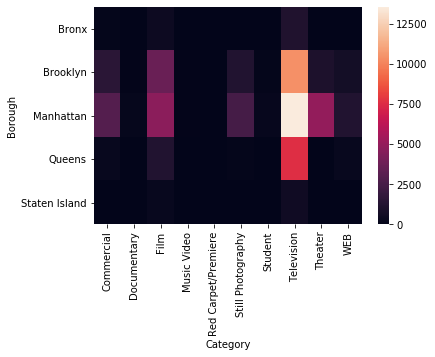

In [14]:
sns.heatmap(film_tab)

Notice that there is also a sub category column for the type of film, commercial, etc.

Can you create a contingency table with the boroughs as the rows and the columns being the categories, broken into their subcategories?  

Hint:  See the last example with the insurance data.

In [15]:
pd.crosstab(film["Borough"], [film["Category"], film['SubCategoryName']])

Category        Commercial                                                \
SubCategoryName Commercial Industrial/Corporate Not Applicable PSA Promo   
Borough                                                                    
Bronx                  118                    6              0   6     8   
Brooklyn              1211                   53              0  41   195   
Manhattan             2362                  235              1  63   344   
Queens                 266                    6              0  10    24   
Staten Island           29                    0              0   0     3   

Category                          Documentary    Film                       \
SubCategoryName Short Trailers Not Applicable Feature Not Applicable Short   
Borough                                                                      
Bronx               0        0             10     422             13    12   
Brooklyn            0        1             61    3040            338   296   
Manhattan           2        1            164    3899            559   281   
Queens              0        1             15    1021            104    67   
Staten Island       0        0              2     242             22     9   

Category               Music Video                               \
SubCategoryName Independent Artist Not Applicable Signed Artist   
Borough                                                           
Bronx                            0              1             4   
Brooklyn                        10             15            57   
Manhattan                       18              4            71   
Queens                           3              2            13   
Staten Island                    0              1             1   

Category        Red Carpet/Premiere Still Photography                 \
SubCategoryName         TV Premiere        Commercial Not Applicable   
Borough                                                                
Bronx                             0                 0             51   
Brooklyn                          0                 0           1171   
Manhattan                         1                 2           2456   
Queens                            0                 0            132   
Staten Island                     0                 0              2   

Category               Student               Television                 \
SubCategoryName Not Applicable Student Film Cable-daily Cable-episodic   
Borough                                                                  
Bronx                        0           12           2            219   
Brooklyn                     1          111          12           2589   
Manhattan                   99          123         188           1977   
Queens                       0           28           1           1734   
Staten Island                0           11           0            178   

Category                                                                     \
SubCategoryName Cable-other Children Daytime soap Episodic series Game show   
Borough                                                                       
Bronx                    18        0            1             798         1   
Brooklyn                129       20            2            6740         7   
Manhattan               504       36           11            5963        88   
Queens                   59       12            6            5089         3   
Staten Island             9       10            0             299         0   

Category                                                                  \
SubCategoryName Made for TV/mini-series Magazine Show Morning Show  News   
Borough                                                                    
Bronx                                20             2           16     2   
Brooklyn                            106             3            3    11   
Manhattan                           246       